In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from wordcloud import WordCloud

In [8]:
def parse_data(file_path):
    data = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            label, text = line.split(' ', 1)
            title, text = text.split(': ', 1)
            label = int(label.replace('__label__', ''))
            data.append((title.strip(), text.strip(), label))
    return pd.DataFrame(data, columns=['title', 'text', 'label'])

In [9]:
df_train = parse_data('train.ft.txt')
df_test = parse_data('test.ft.txt')
df = pd.concat([df_train, df_test])
df

,title,text,label
0,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...,2
1,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...,2
2,Amazing!,This soundtrack is my favorite music of all ti...,2
3,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...,2
4,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine...",2
...,...,...,...
399995,Unbelievable- In a Bad Way,We bought this Thomas for our son who is a hug...,1
399996,"Almost Great, Until it Broke...",My son recieved this as a birthday gift 2 mont...,1
399997,Disappointed !!!,"I bought this toy for my son who loves the ""Th...",1
399998,Classic Jessica Mitford,This is a compilation of a wide range of Mitfo...,2


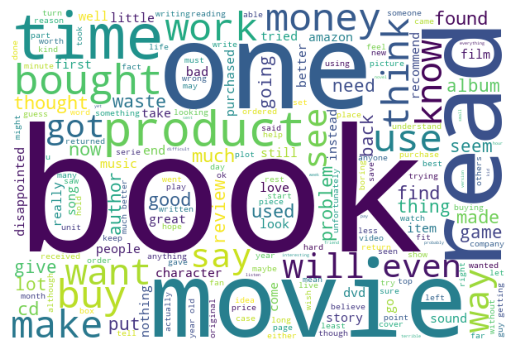

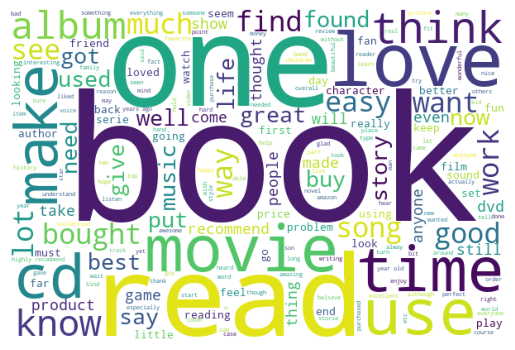

In [11]:
def visualize(label):
    text = ''
    for msg in df[df['label'] == label]['text']:
        msg = msg.lower()
        text += msg + ' '
    wordcloud = WordCloud(width=600, height=400, background_color="white").generate(text)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
# 1 = 1-2 star reviews
# 2 = 4-5 star reviews
visualize(1)
visualize(2)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.20)

In [14]:
print(X_train.shape, y_train.shape)

(3200000,) (3200000,)


In [20]:
tfidf_vectorizer = TfidfVectorizer(max_df=500, min_df=10)

tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test =  tfidf_vectorizer.transform(X_test)

clf = LogisticRegression().fit(tfidf_train, y_train)

predicted = clf.predict(tfidf_test)
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           1       0.67      0.44      0.53    399648
           2       0.58      0.78      0.67    400352

    accuracy                           0.61    800000
   macro avg       0.63      0.61      0.60    800000
weighted avg       0.63      0.61      0.60    800000

